<H2>課題5: Deep Learning</H2>
<p>今回の課題では手書き文字の認識をNeuralnetworkを用いて行います。</p>
<p>下記2-3にKerasから手書き文字のデータをダウンロードするコードが記載されています。</p>
<p>このデータを用いてNeuralnetworkのTrainingを行い、その後に下記のnumber_fileをTest dataとして数字の認識を実施してください。</p>
<p>8・9章で学んだ内容を踏まえ、”4. Dataの前処理”以降の各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [1]:
%matplotlib inline
from __future__ import division, print_function

from keras import backend as K
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<H2> 2. Kerasよりデータを取得</H2>

<p>Kerasのデータセットは予めTraining setとTest setに分けられています。今回はそれを使用します。</p>

In [2]:
# Kerasに付属の手書き数字画像データをダウンロード
np.random.seed(0)
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [3]:
# Traning setのラベルを確認
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# Training setの概要確認
print(X_train.shape, labels_train.shape, sep='\n')

(60000, 28, 28)
(60000,)


In [5]:
# Test setの概要確認
print(X_test.shape, labels_test.shape, sep='\n')

(10000, 28, 28)
(10000,)


<H2> 3. 画像の表示</H2>
<p>画像がどのようなものか分からないので、表示して確認します。</p>

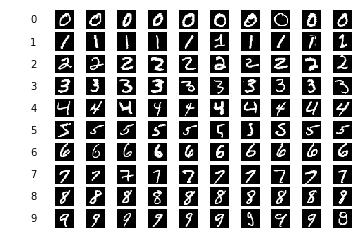

In [6]:
# Training setの画像を表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

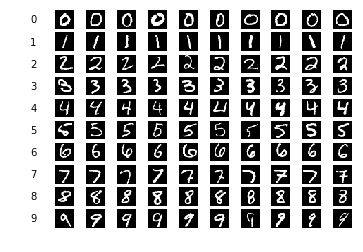

In [7]:
# Test dataの画像表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_test.tolist())}
for x, label in zip(X_test, labels_test):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

↓課題はここから

<H2> 4. Dataの前処理</H2>
<p>画像データを特微ベクトルに変換します。テキスト7章もご参考ください。 </p>

In [8]:
# 各画像は行列なのでベクトルに変換→X_trainとX_testを作成
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [9]:
# ラベルをone-hotベクトル（値がひとつだけ1で他が0のベクトル）に変換→Y_trainとY_testを作成
Y_train = to_categorical(labels_train)
Y_test = to_categorical(labels_test)

　<H2> 5. Deep learningの実施

In [10]:
# モデルの準備
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Trainingの実施
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 4.7769 - acc: 0.6945
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 3.0636 - acc: 0.8046
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.8962 - acc: 0.8152
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.8219 - acc: 0.8210
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.8137 - acc: 0.8215
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.7779 - acc: 0.8241
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 2.6004 - acc: 0.8349
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.6594 - acc: 0.8924
Epoch 9/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.4902 - acc: 0.9034
Epoch 10/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.4594 - acc: 0.9057

In [12]:
# Test dataを用いてモデルを評価（accuracyを算出）
_, acc = model.evaluate(X_test, Y_test, verbose=1)
print('accuracy: {}'.format(acc))

10000/10000 [==============================] - 0s 24us/step
accuracy: 0.9192


In [13]:
# Classification_report関数で評価結果を表示
labels_pred = model.predict_classes(X_test, verbose=1)
print(confusion_matrix(labels_test, labels_pred))
print(classification_report(labels_test, labels_pred))

10000/10000 [==============================] - 0s 16us/step
[[ 959    0    1    2    0    2   13    1    2    0]
 [   0 1105    5    4    0    1    4    2   14    0]
 [   6    5  922   24   19    3   14   13   25    1]
 [   3    1   16  936    0    8    3   11   22   10]
 [   1    2    4    0  902    0   13    5    3   52]
 [   9    1    5   56   16  736   19   11   30    9]
 [   8    2    3    2    8    9  922    1    3    0]
 [   1    6   25    7    8    0    0  961    3   17]
 [   4    7    5   20   11   19   12   22  865    9]
 [   8    5    2   14   20    7    1   59    9  884]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.97      0.97      0.97      1135
          2       0.93      0.89      0.91      1032
          3       0.88      0.93      0.90      1010
          4       0.92      0.92      0.92       982
          5       0.94      0.83      0.88       892
          6       0.92      0.96     

<H2>6. Training後のモデルを用いてnumber_file中の画像の数字を予測

In [14]:
# 必要なモジュールの読み込み
import numpy as image_np
from PIL import Image

In [15]:
#画像を取得→画像を数値に変換→数値を1行に変換→データをモデルに入れて予測→ファイルを読み込んだ上でデータを判定

CHECK_FILE_NUM = 5

for i in range(1,CHECK_FILE_NUM):
    image = Image.open('./number_file/handnumber'+str(i)+'.jpg').convert('L')
    image = image_np.asarray(image)
    image = image.reshape((1, -1))
    result = model.predict(image)

    print("Source File Number is", './number_file/handnumber'+str(i)+'.jpg')  
    print("Source File Number is", result)   

Source File Number is ./number_file/handnumber1.jpg
Source File Number is [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Source File Number is ./number_file/handnumber2.jpg
Source File Number is [[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  5.261119e-29 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
Source File Number is ./number_file/handnumber3.jpg
Source File Number is [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Source File Number is ./number_file/handnumber4.jpg
Source File Number is [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
